In [14]:
# u' = 0.98u
# u(0) = 1.0


using DifferentialEquations, Plots

f(u, p, t) = 0.98 * u # eq diff
u0 = 1.0 # cond inicial
tspan = (0.0, 1.0) # intervalo de tempo
prob = ODEProblem(f, u0, tspan) # class prob
sol = solve(prob) # solver

retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.3521860297865888
 0.6934436122197829
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908713484919
 1.9730384457359207
 2.6644561424814275

- `sol.t`: valores de tempo avaliados
- `sol.u`: valores que `u` assume no tempo definido por `sol.t`

In [15]:
sol = solve(prob, abstol=1e-8, reltol=1e-8) # solver)

retcode: Success
Interpolation: 3rd order Hermite
t: 9-element Vector{Float64}:
 0.0
 0.04127492324135852
 0.1467996584661757
 0.2863160761604835
 0.43819505813727505
 0.6118935375085506
 0.7985672130970897
 0.9993530659325827
 1.0
u: 9-element Vector{Float64}:
 1.0
 1.0412786454705882
 1.1547266684753283
 1.3239103644245234
 1.5363833139954357
 1.8214914923257337
 2.1871424376962705
 2.6627675243458926
 2.6644562419335167

In [16]:
sol = solve(prob, saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0
u: 11-element Vector{Float64}:
 1.0
 1.102962785129292
 1.2165269512238137
 1.3417838212275692
 1.4799379510587105
 1.6323162070541077
 1.8003833264981222
 1.9857565541588291
 2.190215812799756
 2.415725742084566
 2.6644561424814275

In [17]:
sol = solve(prob, saveat=[0.2, 0.7, 0.9])

retcode: Success
Interpolation: 1st order linear
t: 3-element Vector{Float64}:
 0.2
 0.7
 0.9
u: 3-element Vector{Float64}:
 1.2165269512238137
 1.9857565541588291
 2.415725742084566

In [18]:
sol = solve(prob, alg_hints = [:stiff])

retcode: Success
Interpolation: 3rd order Hermite
t: 5-element Vector{Float64}:
 0.0
 0.10042494449239292
 0.3521860297865888
 0.6934436122197829
 1.0
u: 5-element Vector{Float64}:
 1.0
 1.1034222047865465
 1.4121908713484919
 1.9730384457359207
 2.6644561424814275

In [19]:
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ*(u[2] - u[1])
    du[2] = u[1]*(ρ - u[3]) - u[2]
    du[3] = u[1]*u[2] - β*u[3]
    
end
u0= [1.0, 0.0, 0.0]
p = (10, 28, 8/3)
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 1292-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262408731175873
   0.009058076622686189
   0.01695647090176743
   0.027689960116420883
   0.041856352219618344
   0.060240411865493296
   0.08368541210909924
   ⋮
  99.43545175575305
  99.50217600300971
  99.56297541572351
  99.62622492183432
  99.69561088424294
  99.77387244562912
  99.86354266863755
  99.93826978918452
 100.0
u: 1292-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591548287857, 0.0897706331002921, 0.00014380191884671585]
 [0.9242043547708632, 0.24228915014052968, 0.0010461625485930237]
 [0.8800455783133068, 0.43873649717821195, 0.003424260078582332]
 [0.8483309823046307, 0.6915629680633586, 0.008487625469885364]
 [0.8495036699348377, 1.0145426764822272, 0.01821209108471829]
 [0.91

In [20]:
A = convert(Array, sol)

3×1292 Matrix{Float64}:
 1.0  0.999643     0.996105    0.969359     …  -10.9419  -14.7174  -13.7145
 0.0  0.000998805  0.0109654   0.0897706       -17.3122  -16.9687   -8.32331
 0.0  1.78143e-8   2.14696e-6  0.000143802      20.6591   33.0663   38.7982

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


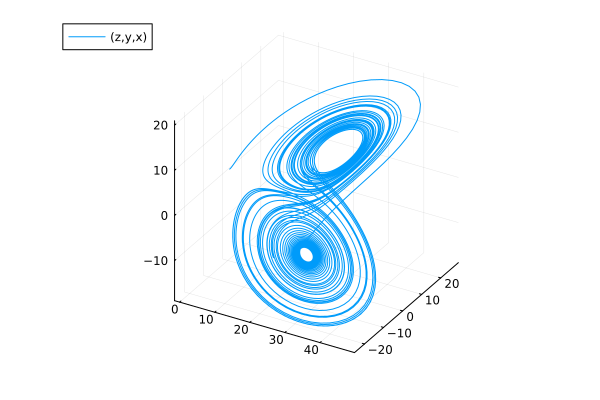

In [23]:
plot(sol, vars=(1,2,3))

In [22]:
using ModelingToolkit, DifferentialEquations

@parameters t σ=10.0 ρ=28 β=8/3

@variables x(t)=1.0 y(t)=1.0 z(t)=0.0

D=Differential(t)

eqs = [
    D(x) ~ σ * (y - x),
    D(y) ~ x * (ρ - z) - y,
    D(z) ~ x * y - β * z
]

@mtkbuild lorenz_sys = ODESystem(eqs, t)
tspan = (0.0, 50.0)
prob = ODEProblem(lorenz_sys, [], tspan)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 628-element Vector{Float64}:
  0.0
  0.001412287104387049
  0.007310244662931266
  0.01823241950360007
  0.03353808969441954
  0.054145180686812136
  0.08070145204560036
  0.1119642371537583
  0.1472513252390905
  0.18642525507528013
  ⋮
 49.49883994680239
 49.556210441027396
 49.61298596684668
 49.67978174264418
 49.74116191300884
 49.80529928959488
 49.87082005992508
 49.94503061748987
 50.0
u: 628-element Vector{Vector{Float64}}:
 [0.0, 1.0, 1.0]
 [0.0014366416261147998, 1.0381073639366913, 1.0002678832397107]
 [0.00797498470963794, 1.197110479078595, 1.0070325430749252]
 [0.02257007541240267, 1.4948856426966672, 1.0423213541314702]
 [0.049621264253304556, 1.9334405830486545, 1.1380612745489052]
 [0.10323030706178324, 2.5979070016700097, 1.3485269323786166]
 [0.22023784046172185, 3.6553978667361338, 1.763363509163348]
 [0.48803465781258154, 5.336256820317382, 2.4961230018848997]
 [1.1430298068355629, 8.0564890750348, 3.74325716642